In [679]:
import pandas as pd
from sklearn.metrics  import mean_squared_error
from sklearn.decomposition import PCA , IncrementalPCA
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso 
from sklearn.linear_model import Ridge

In [680]:
data = pd.read_csv("dataML.csv")

In [681]:
df = data.copy(deep = True)


In [682]:
cols = ["Tenure Months" , "Churn Value" , "Dependents_Yes" ]

In [683]:
target = df["Churn Score"]
features =df[cols]


In [684]:
features["Tenure Months"] = features["Tenure Months"]*3
features["Churn Value"] = features["Churn Value"]*30

C:\Users\DELL\AppData\Local\Temp\ipykernel_12368\4083490930.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features["Tenure Months"] = features["Tenure Months"]*3
C:\Users\DELL\AppData\Local\Temp\ipykernel_12368\4083490930.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features["Churn Value"] = features["Churn Value"]*30


In [685]:
features

,Tenure Months,Churn Value,Dependents_Yes
0,6,30,0
1,6,30,1
2,24,30,1
3,84,30,1
4,147,30,1
...,...,...,...
7027,216,0,0
7028,72,0,1
7029,216,0,1
7030,33,0,1


In [686]:
from sklearn.preprocessing import StandardScaler

In [687]:
scaler = StandardScaler()
features_Scaled = scaler.fit_transform(features)
features_Scaled=  pd.DataFrame(features_Scaled, columns= features.columns)

Divicion de datos

In [688]:
from sklearn.model_selection import train_test_split

In [689]:
X_train , X_test , y_train , y_test = train_test_split(features_Scaled,target, test_size=.2, random_state=42) 

IPCA

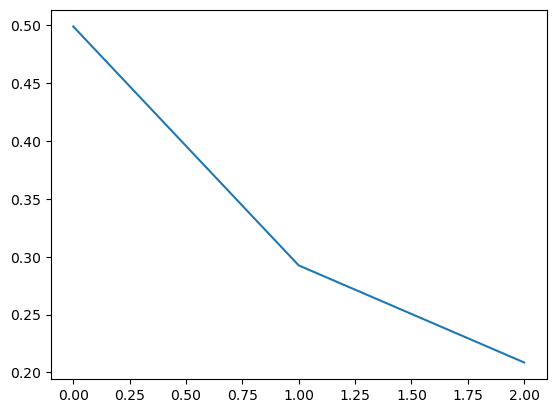

In [690]:
ipca = IncrementalPCA(n_components=3, batch_size= 10).fit(X_train)
plt.plot(
    range(len(ipca.explained_variance_)),
    ipca.explained_variance_ratio_)

Regresion Logistica 

In [691]:
modelo_linear = LinearRegression()
modelo_linear2 = LinearRegression()

In [692]:
modelo_linear.fit(X_train , y_train)
modelo_linear.score(X_test,y_test)

0.44740445854622557

In [693]:
X_trainIPCA = ipca.transform(X_train)
X_testIPCA = ipca.transform(X_test)
modelo_linear2.fit(X_trainIPCA , y_train)
modelo_linear2.score(X_testIPCA,y_test)

0.4474044585462258

In [694]:
from sklearn.linear_model import (
    RANSACRegressor, HuberRegressor
)

from sklearn.svm import SVR

In [695]:
# la manera profecional de hacer estimadores 
# usamos los estimadores y le pasamos sus parametros 
# ransac es un meta estimador, si no le definimos parametro lo toma como regresion lineal
# le ponemos el valor por defecto
estimadores = {
        'SVR' : SVR(gamma= 'auto', C=1.0, epsilon=0.1),
        'RANSAC' : RANSACRegressor(),
        'HUBER':HuberRegressor(epsilon=1.35,max_iter=10000)
    }

In [696]:
for name , estimador in estimadores.items():
    estimador.fit(X_train , y_train)
    predictions = estimador.predict(X_test)
    score = estimador.score(X_test, y_test)
    print( score, "_"*50)
    print(name)
    print("error medio cuadrado:" , "%.10f" % float (mean_squared_error(y_test , predictions)))

0.4435768861531587 __________________________________________________
SVR
error medio cuadrado: 259.0790585770
0.1667737814066923 __________________________________________________
RANSAC
error medio cuadrado: 387.9627911256
0.44688473261820294 __________________________________________________
HUBER
error medio cuadrado: 257.5388749887


Prueba

In [697]:
for name , estimador in estimadores.items():
    estimador.fit(X_trainIPCA , y_train)
    score = estimador.score(X_testIPCA, y_test)
    predictions = estimador.predict(X_testIPCA)
    print("_"*50)
    print(score)
    print(name)
    print("error medio cuadrado:" , "%.10f" % float (mean_squared_error(y_test , predictions)))

__________________________________________________
0.4435768861531587
SVR
error medio cuadrado: 259.0790585770
__________________________________________________
0.4367720310758928
RANSAC
error medio cuadrado: 262.2475025242
__________________________________________________
0.44688473259674766
HUBER
error medio cuadrado: 257.5388749987


In [698]:
modeloLasso = Lasso(alpha = .02).fit(X_train , y_train)
y_predicLasso = modeloLasso.predict(X_test)
print (modeloLasso.score(X_test , y_test))

0.4474190018454257


In [699]:
model_Ridge = Ridge(alpha = 1).fit(X_train , y_train)
y_predictRidge = model_Ridge.predict(features)
print (model_Ridge.score(X_test , y_test))

0.447404180306626


In [703]:
print(y_predictRidge)

[489.78768988 489.45082325 492.73514214 ...  97.89035829  64.49978292
  94.94290604]


no hay mucha correlacion del churn score con las variables